In [332]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [72]:
data = pd.read_csv('Heart.csv', delimiter=';')
data = data.drop(data[data.ca == '?'].index)
data = data.drop(data[data.thal == '?'].index)
X = data.iloc[:,0:13].values
y = data['num']
y = y.replace(to_replace = [1,2,3,4], value=1)
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
5     56    1   2       120   236    0        0      178      0      0.8   
6     62    0   4       140   268    0        2      160      0      3.6   
7     57    0   4       120   354    0        0      163      1      0.6   
8     63    1   4       130   254    0        2      147      0      1.4   
9     53    1   4       140   203    1        2      155      1      3.1   
10    57    1   4       140   192    0        0      148      0      0.4   
11    56    0   2       140   294    0        2      153      0      1.3   
12    56    

In [206]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [271]:
errorbc = []
errorrfc = []
oob_bc_err = []
oob_rfc_err = []
for i in range(1, 302):
    bc = BaggingClassifier(n_estimators = i, oob_score = True)
    bc.fit(x_train, y_train)
    y_predict1 = bc.predict(x_test)
    oob_bc_err.append(1-bc.oob_score_)
    test1 = (y_test == y_predict1)
    errorbc.append(len(test1[test1==False])/len(y_test))
    rfc = RandomForestClassifier(n_estimators = i, oob_score= True)
    rfc.fit(x_train, y_train)
    y_predict2 = rfc.predict(x_test)
    oob_rfc_err.append(1-rfc.oob_score_)
    test2 = (y_test == y_predict2)
    errorrfc.append(len(test2[test2==False])/len(y_test))

/home/juan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:603: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/juan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:608: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/home/juan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/juan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/juan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:603: UserWarning: Some inputs do no

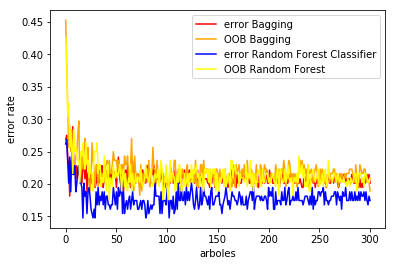

In [319]:
plt.plot(errorbc, color = 'red', label = 'error Bagging')
plt.plot(oob_bc_err, color = 'orange', label = 'OOB Bagging')
plt.plot(errorrfc, color = 'blue', label = 'error Random Forest Classifier')
plt.plot(oob_rfc_err, color = 'yellow', label = 'OOB Random Forest')
plt.legend()
plt.ylabel('error rate')
plt.xlabel('arboles')
plt.show()

In [303]:
data = pd.read_csv('OJ.csv')
X = data[['WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE']].values
y = data['Purchase']

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

labelencoder_x = LabelEncoder()
X[:,12] = labelencoder_x.fit_transform(X[:,12])

print(data)

      Unnamed: 0 Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  \
0              1       CH             237        1     1.75     1.99    0.00   
1              2       CH             239        1     1.75     1.99    0.00   
2              3       CH             245        1     1.86     2.09    0.17   
3              4       MM             227        1     1.69     1.69    0.00   
4              5       CH             228        7     1.69     1.69    0.00   
5              6       CH             230        7     1.69     1.99    0.00   
6              7       CH             232        7     1.69     1.99    0.00   
7              8       CH             234        7     1.75     1.99    0.00   
8              9       CH             235        7     1.75     1.99    0.00   
9             10       CH             238        7     1.75     1.99    0.00   
10            11       CH             240        7     1.86     2.09    0.00   
11            12       CH             26

In [304]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [307]:
errorp = []
errorps = []
errorp2 = []
for i in range(1, 502, 10):
    rfc1 = RandomForestClassifier(n_estimators = i, max_features=None)
    rfc2 = RandomForestClassifier(n_estimators = i, max_features="sqrt")
    rfc3 = RandomForestClassifier(n_estimators = i, max_features=0.5)
    
    
    rfc1.fit(x_train, y_train)
    y_pred1 = rfc1.predict(x_test)
    test1 = (y_test == y_pred1)
    errorp.append(len(test1[test1==False])/len(y_test))
    
    rfc2.fit(x_train, y_train)
    y_pred2 = rfc2.predict(x_test)
    test2 = (y_test == y_pred2)
    errorps.append(len(test2[test2==False])/len(y_test))
    
    rfc3.fit(x_train, y_train)
    y_pred3 = rfc3.predict(x_test)
    test3 = (y_test == y_pred3)
    errorp2.append(len(test3[test3==False])/len(y_test))

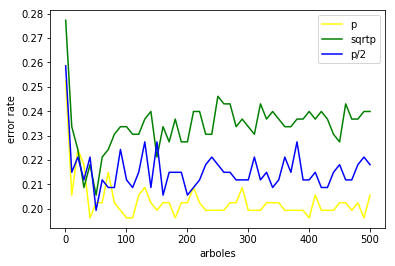

In [318]:
plt.plot(np.linspace(1,500,len(errorp)), errorp, color = 'yellow', label = 'p')
plt.plot(np.linspace(1,500,len(errorp)), errorps, color = 'green', label = 'sqrtp')
plt.plot(np.linspace(1,500,len(errorp)), errorp2, color = 'blue', label = 'p/2')
plt.legend()
plt.ylabel('error rate')
plt.xlabel('arboles')
plt.show()

/home/juan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


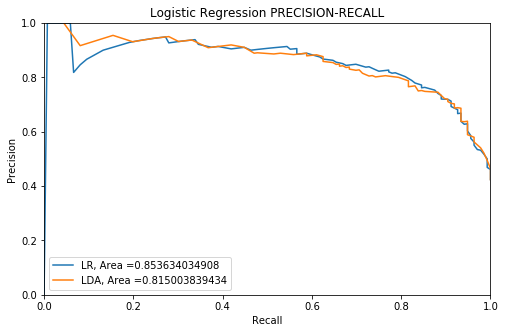

In [335]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
proba_yes = lr.predict_proba(x_test)[:,1]

n_p = 100
error_rate = np.zeros(n_p)
precision_lr = np.zeros(n_p)
recall_lr = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

for i in range(n_p):
    ii = proba_yes>threshold[i]
    y_predict[ii] = 1
    y_predict[~ii] = 0
    true_positive = (y_test == 1) & (y_predict == 1) 
    false_positive = (y_test == 0) & (y_predict == 1)
    false_negative = (y_test == 1) & (y_predict == 0)
    true_negative = (y_test == 0) & (y_predict == 0)
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    if((n_tp+n_fp)>0): precision_lr[i] = n_tp/(n_tp + n_fp)
    if((n_tp+n_fn)>0): recall_lr[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)
        
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_predict = lda.predict(x_test)
proba_yes = lda.predict_proba(x_test)[:,1]

n_p = 100
error_rate = np.zeros(n_p)
precision_lda = np.zeros(n_p)
recall_lda = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

for i in range(n_p):
    ii = proba_yes>threshold[i]
    y_predict[ii] = 1
    y_predict[~ii] = 0
    true_positive = (y_test == 1) & (y_predict == 1) 
    false_positive = (y_test == 0) & (y_predict == 1)
    false_negative = (y_test == 1) & (y_predict == 0)
    true_negative = (y_test == 0) & (y_predict == 0)
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    if((n_tp+n_fp)>0): precision_lda[i] = n_tp/(n_tp + n_fp)
    if((n_tp+n_fn)>0): recall_lda[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)
        



plt.figure(figsize=(8,5))
plt.plot(recall_lr, precision_lr, label = 'LR, Area =' + str(-np.trapz(precision_lr, recall_lr)))
plt.plot(recall_lda, precision_lda, label = 'LDA, Area =' + str(-np.trapz(precision_lda, recall_lda)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression PRECISION-RECALL')
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()




In [339]:
#como antes encontramos que el error de p era mejor solo variaremos el número de árboles
areap = []
for j in range(1, 102, 10):
    rfc1 = RandomForestClassifier(n_estimators = j, max_features=None)
 
    rfc1.fit(x_train, y_train)
    y_pred1 = rfc1.predict(x_test)
    proba_yes = lda.predict_proba(x_test)[:,1]

    n_p = 100
    error_rate = np.zeros(n_p)
    precision_rfc = np.zeros(n_p)
    recall_rfc = np.zeros(n_p)
    tp_rate = np.zeros(n_p)
    fp_rate = np.zeros(n_p)
    threshold = np.linspace(0,0.99, n_p)

    for i in range(n_p):
        ii = proba_yes>threshold[i]
        y_predict[ii] = 1
        y_predict[~ii] = 0
        true_positive = (y_test == 1) & (y_predict == 1) 
        false_positive = (y_test == 0) & (y_predict == 1)
        false_negative = (y_test == 1) & (y_predict == 0)
        true_negative = (y_test == 0) & (y_predict == 0)
        n_tp = np.count_nonzero(true_positive)
        n_fp= np.count_nonzero(false_positive)
        n_fn = np.count_nonzero(false_negative)
        n_tn = np.count_nonzero(true_negative)
        if((n_tp+n_fp)>0): precision_rfc[i] = n_tp/(n_tp + n_fp)
        if((n_tp+n_fn)>0): recall_rfc[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
        if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)
    
    areap.append(-np.trapz(precision_lr, recall_lr))
    